# Multiple Linear Regression - MLR

Linear Regression - Multi Input

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

In [26]:
def model(X, w, b):
    # y = np.dot(X, w) + b
    y = X @ w + b
    return y

In [27]:
def compute_cost(X, y, w, b):
    # J function
    m = X.shape[0]
    e = y - model(X, w, b)  # (w*x+b)
    total_cost = (1/(2 * m)) * sum(e**2)
    return total_cost

In [28]:
def zscore_normalize_f(X):
    m = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-m) / sigma
    return X_norm

In [29]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_N_train = zscore_normalize_f(X_train)  # type: ignore

In [30]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [31]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904045996674e-12


In [32]:
def compute_gradient(X, y, w, b):
    # Number of training examples
    m = X.shape[0]
    e = model(X, w, b) - y
    dw = (1/m) * X.T @ e
    db = (1/m) * e
    # dw = sum(dw)
    db = sum(db)
    return dw, db

In [33]:
from copy import deepcopy


def gradient_descent(x, y, w_in=0, b_in=0, alpha=1, num_iters=100):

    w = deepcopy(w_in)
    b = deepcopy(b_in)
    p_history = [(w, b)]
    cost_history = [compute_cost(x, y, w, b)]  # J

    for i in range(num_iters):
        dw, db = compute_gradient(x, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        p_history.append((w, b))
        cost_history.append(compute_cost(x, y, w, b))
        if i % 100 == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ")

    return w, b, p_history, cost_history

In [34]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-8
# run gradient descent
w_final, b_final, p_history, cost_history = gradient_descent(
    X_train, y_train, initial_w, initial_b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")
print("final cost", cost_history[-1])

Iteration    0: Cost 4.72e+04 
Iteration  100: Cost 1.07e+03 
Iteration  200: Cost 7.00e+02 
Iteration  300: Cost 6.97e+02 
Iteration  400: Cost 6.97e+02 
Iteration  500: Cost 6.97e+02 
Iteration  600: Cost 6.97e+02 
Iteration  700: Cost 6.97e+02 
Iteration  800: Cost 6.97e+02 
Iteration  900: Cost 6.97e+02 
Iteration 1000: Cost 6.97e+02 
Iteration 1100: Cost 6.97e+02 
Iteration 1200: Cost 6.97e+02 
Iteration 1300: Cost 6.97e+02 
Iteration 1400: Cost 6.97e+02 
Iteration 1500: Cost 6.97e+02 
Iteration 1600: Cost 6.97e+02 
Iteration 1700: Cost 6.97e+02 
Iteration 1800: Cost 6.97e+02 
Iteration 1900: Cost 6.97e+02 
Iteration 2000: Cost 6.97e+02 
Iteration 2100: Cost 6.97e+02 
Iteration 2200: Cost 6.97e+02 
Iteration 2300: Cost 6.97e+02 
Iteration 2400: Cost 6.97e+02 
Iteration 2500: Cost 6.97e+02 
Iteration 2600: Cost 6.97e+02 
Iteration 2700: Cost 6.96e+02 
Iteration 2800: Cost 6.96e+02 
Iteration 2900: Cost 6.96e+02 
Iteration 3000: Cost 6.96e+02 
Iteration 3100: Cost 6.96e+02 
Iteratio

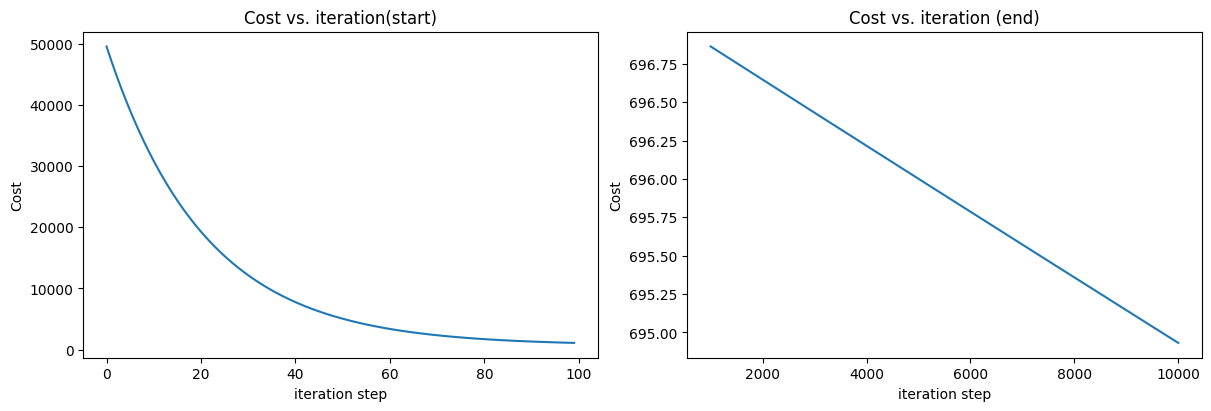

In [35]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [39]:
# normalized
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, p_history, cost_history = gradient_descent(
    X_N_train, y_train, initial_w, initial_b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")
print("final cost", cost_history[-1])

Iteration    0: Cost 4.83e+04 
Iteration  100: Cost 5.58e+03 
Iteration  200: Cost 7.46e+02 
Iteration  300: Cost 9.99e+01 
Iteration  400: Cost 1.34e+01 
Iteration  500: Cost 1.79e+00 
Iteration  600: Cost 2.40e-01 
Iteration  700: Cost 3.22e-02 
Iteration  800: Cost 4.31e-03 
Iteration  900: Cost 5.77e-04 
Iteration 1000: Cost 7.73e-05 
Iteration 1100: Cost 1.04e-05 
Iteration 1200: Cost 1.39e-06 
Iteration 1300: Cost 1.86e-07 
Iteration 1400: Cost 2.49e-08 
Iteration 1500: Cost 3.34e-09 
Iteration 1600: Cost 4.47e-10 
Iteration 1700: Cost 5.99e-11 
Iteration 1800: Cost 8.02e-12 
Iteration 1900: Cost 1.07e-12 
Iteration 2000: Cost 1.44e-13 
Iteration 2100: Cost 1.93e-14 
Iteration 2200: Cost 2.58e-15 
Iteration 2300: Cost 3.46e-16 
Iteration 2400: Cost 4.64e-17 
Iteration 2500: Cost 6.21e-18 
Iteration 2600: Cost 8.33e-19 
Iteration 2700: Cost 1.12e-19 
Iteration 2800: Cost 1.49e-20 
Iteration 2900: Cost 2.01e-21 
Iteration 3000: Cost 2.72e-22 
Iteration 3100: Cost 3.51e-23 
Iteratio

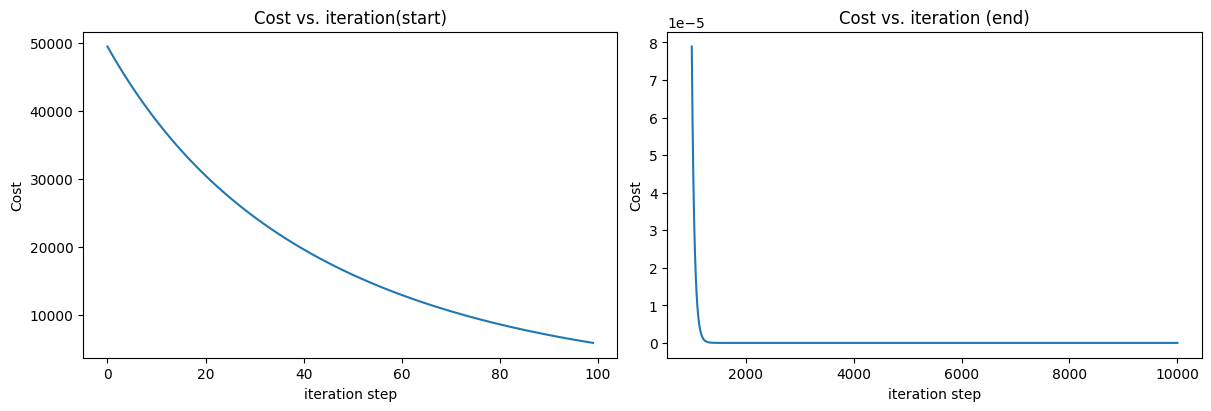

In [40]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()